
    
# Принятие решений в бизнесе

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

# Цель исследования:

1. Приоритизировать гипотезы использовав фреймворки
2. Анализ A/B-теста
    
    # Ход исследования:
    Данные для анализа я получу из следующих файлов:
    - /datasets/hypothesis.csv
    - /datasets/orders.csv
    - /datasets/visitors.csv
    
    Для начала я проведу обзор данных и их предобработку. Так же изменю типы данных, если это будет необходимо.
        
    После предобработки данных я начну работу с гипотезами и принятием решений в бизнесе.
    
    Мое исследование пройдёт по следующим этапам:
    - Обзор данных;
    - Предобработка данных;
    - Приоритезация гипотиз с помощью фреймворков ICE и RICE;
    - Анализ A/B-теста;
    - Общие выводы.


# Часть 1. Приоритизация гипотез.

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

# Задача

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime, timedelta

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
hypothesis.info() #общая информация о датафрейме
hypothesis.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
orders.info() #общая информация о датафрейме
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [5]:
visitors.info() #общая информация о датафрейме
visitors.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<p>
<div class="alert-info">
<b>Комментарий студента</b>

Изучил основную информацию о данных в датафрейме.
    
Так же предварительно посмотрев, можно сделать вывод, что данные без пропусков. В каждом столбце одинаковое количество строк данных.
    
В глаза ещё бросилось то, что дата имеет тип данных - object. Сменю тип данных столбцов.
    
Название столбцов приведу к нижнему регистру для удобства и меньшей вероятности ошибиться.
</div>

In [6]:
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()
visitors.columns = visitors.columns.str.lower()

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Привел столбцы к нижнему регистру.
</div>

In [7]:
display(hypothesis.head(10))
display(orders.head(10))
display(visitors.head(10))

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [8]:
hypothesis.drop_duplicates()
display(hypothesis.duplicated().sum())
hypothesis.info()
orders.drop_duplicates()
display(orders.duplicated().sum())
orders.info()
visitors.drop_duplicates()
display(visitors.duplicated().sum())
visitors.info()

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


<p>
<div class="alert-info">
<b>Комментарий студента</b>

Провел проверку дубликатов. Как видно их не оказалось.
</div>

In [9]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [10]:
hypothesis.info()
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFr

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Изменил типы данных. Изменил только даты, остальные типы данных корректные.
    
На этом завершаю предобработку данных.
</div>

In [11]:
hypothesis.head(10)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


# Применение фреймворка ICE

In [12]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False).round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


# Применение фреймворка RICE

In [13]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


In [14]:
hypothesis[['hypothesis','ICE', 'RICE']].sort_values(by='RICE', ascending=False).head(5)

,hypothesis,ICE,RICE
7,Добавить форму подписки на все основные страни...,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.200000,16.2


<div class="alert-info">
    
# Вывод

При применении RICE изменился приоритет гипотез. Это случилось в связи с тем, что у RICE есть показатель `Reach`, который отвечает за то, скольких пользователей затронет данная гипотеза.

Учитывая что у 7 гипотезы больших охват затронутых пользователей - данная гипотеза будет приоритетнее остальных и в данном случае фреймворк RICE так же является наиболее подходящим.
</div>

# Часть 2. Анализ A/B-теста.

Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

# 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [15]:
# проверим группы на совпадения пользователей

vis_group_a = orders[orders['group'] == 'A']['visitorid']

vis_group_b = orders[orders['group'] == 'B']['visitorid']

orders_ab_group = orders.query('visitorid in @vis_group_a and visitorid in @vis_group_b')

print('Количество пользователей в двух группах:', orders_ab_group['visitorid'].nunique())

print('Всего пользователей в тесте:', orders['visitorid'].nunique())



Количество пользователей в двух группах: 58
Всего пользователей в тесте: 1031


<p>
<div class="alert-info">
<b>Комментарий студента 2</b>
    
Да, пересечение есть, 58 пользователей оказались в обеих группах.

Можно их как убрать из анализа теста, так и оставить, так как увидим поведение этих же пользователей и в одной и в другой группе, их изменение.
</div>

In [16]:
display(orders.head(10))
display(visitors.head(10))

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [17]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [18]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}
    ), 
    axis=1
).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}
    ),
    axis=1
).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData  = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


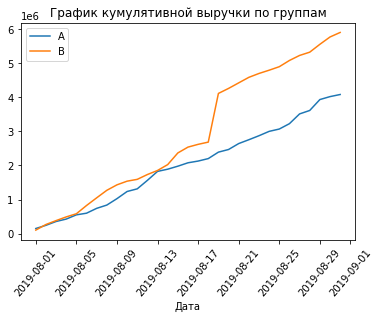

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.xticks(rotation=50)
plt.legend() 

<p>
<div class="alert-info">
<b>Комментарий студента</b>
    
Выручка почти равномерно увеличивается в течение части теста. График группы B немного лидировал.
    
    
Однако график группы B примерно 18 августа резко вырос. Это может значить что либо появились очень дорогие заказы в данной группе, либо заказов стало очень много.
    
    
В то же время график группы A равномерно увеличивается без резких скачков.
</div>

# 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.


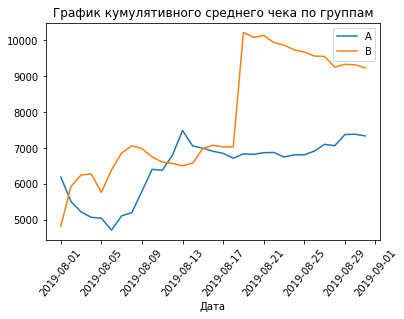

In [20]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.xticks(rotation=50)
plt.legend() 

<p>
<div class="alert-info">
<b>Комментарий студента</b>
    
Из графика можно увидеть рост среднего чека в обеих группах, однако для группы A этот рост закончился 13 августа и пошел на небольшой спад, далее в этой группе был равномерный график среднего чека.
    
В группе B видно как 18 августа средний чек очень сильно вырос. Предположительно что всё же график у группы B так сильно растёт из-за очень дорогих заказов.
</div>

# 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.


(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

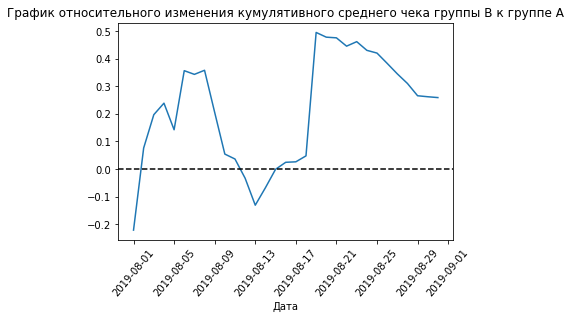

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date']
         , (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.xticks(rotation=50)

<p>
<div class="alert-info">
<b>Комментарий студента</b>
    
Видно как несколько раз график сильно подскочил  вверх, судя по всему в этот момент в группе B и были совершены крупные заказы.
</div>

# 4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.


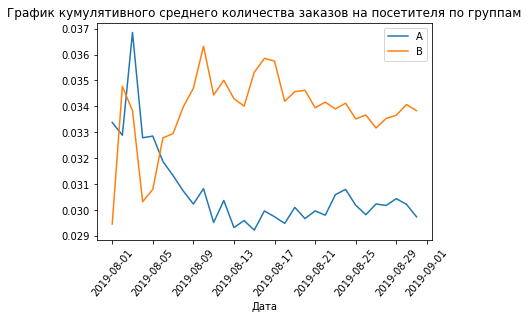

In [22]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.xticks(rotation=50)
plt.legend()


<p>
<div class="alert-info">
<b>Комментарий студента</b>

На графике можно увидеть что значения группы B сначала упали, а затем значительно поднялись и зафиксировались на одном значении. Аналогично у группы A, значения значала были высокими, а затем упали и зафиксировались на одном уровне.
    
Конверсия больше и лучше у группы B, чем у группы A.
</div>

# 5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.


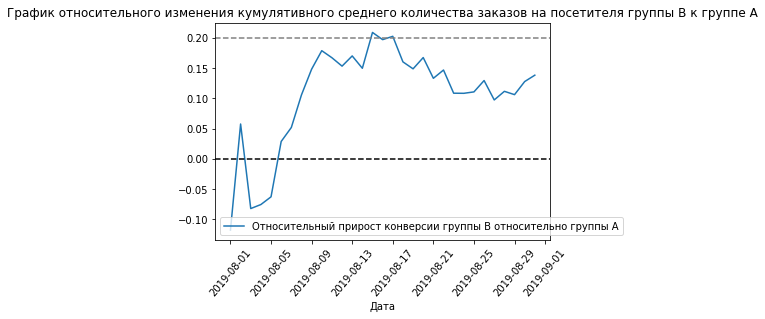

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])


plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.20, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.xticks(rotation=50)
plt.legend()

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Группа B вначале теста проседала по сравнению с группой B и проигрывала ей по показателям. Однако начиная с 5 августа у группы B начался большой подъём и её конверсия росла.

Из этих данных пока можно рассуждать о том, что группа B опережает группу A. Но на такие показатели так же могли влиять аномально большие заказы.
</div>

# 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.


Text(0, 0.5, 'Количество заказов')

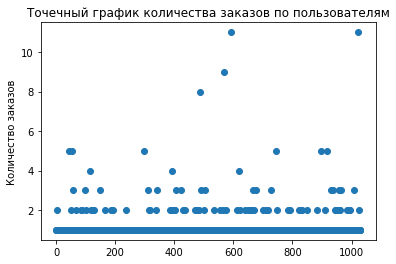

In [24]:
# одсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['visitorid', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Из точечного графика видно, что есть заказы превышающие 10. Видно что есть большая доля пользователей сделавших 2 заказа. Более двух заказов сделано крайне мало.
    
Для более точного анализа в долях по количеству заказов будет видно в следующем коде, где я проведу подсчёт перцентилей.
</div>

# 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.


In [25]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

<p>
<div class="alert-info">
<b>Комментарий студента</b>
    
Из полученных данных делаем вывод:

- Не больше, чем 5% пользователей делали больше двух заказов.
- Не больше, чем 1% пользователей делали больше четырёх заказов.
    
Разумно было бы выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов и уже по ней отсеять аномальных пользователей.
</div>

# 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.


Text(0, 0.5, 'Стоимость заказов в млн.')

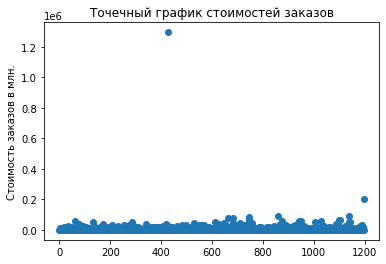

In [26]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказов в млн.')

<p>
<div class="alert-info">
<b>Комментарий студента</b>

В данном графике видно два аномально больших заказа, причем один даже очень большой и его стоимость выше 1 млн. Данный заказявляется более чем аномальным.
</div>

(0.0, 220000.0)

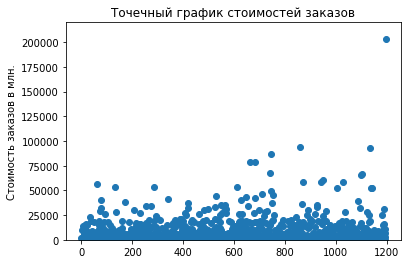

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказов в млн.')
plt.ylim(0, 220000)

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Решил сделать немного более подробный график, ограничив его первым большим аномальным заказом в примерно 210000.
    
Из этого гграфика можно сделать дополнительные выводы, например что основная часть заказов по стоимости не превышает 25000, остальные заказы уже выглядят более аномальными.
</div>

# 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.


In [28]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Собственно, как я и приводил выше предположение, что основная часть заказов не превышает стоимостью 25000 имеет место быть.
    
Из анализа перцентелей можно сделать следующие выводы:
- Не больше, чем 5% пользователей делали заказ дороже, чем 28000.
- Не больше, чем 1% пользователей делали заказ дороже, чем 58233.
    
За верхнюю границу я бы предпочел взять 28000, так как всё что ниже 28000 тысяч выглядит как основная масса, а всё что выше, как аномалии.
</div>

# 10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.


<p>
<div class="alert-info">
<b>Комментарий студента</b>

Ранее я определил следующее:
- Оценил результаты A/B-теста визуально и выяснил, что в данных, скорее всего, есть выбросы
- Увидел выбросы и нашёл границу для их определения.
    
Так же сразу сформулирую гипотезы:
    
- **Нулевая**: различий в среднем количестве заказов на посетителя между группами нет. 
- **Альтернативная**: различия в среднем количестве заказов на посетителя между группами есть.
</div>

In [29]:
# Подготовка данных

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


<p>
<div class="alert-info">
<b>Комментарий студента</b>

Создам переменные `ordersByUsersA` и `ordersByUsersB` со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
</div>



In [30]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
</div>

In [31]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [32]:
# Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1.  Округлим до трёх знаков после запятой.

print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))




0.017
0.138


<p>
<div class="alert-info">
<b>Комментарий студента</b>

Первое получившиеся число это p-value и оно равно 0.017, что значительно меньше чем 0.05.

В таком случае нулевую гипотезу о том, что различий в среднем количестве заказов на посетителя между группами нет - отвергаем.
    
Второе число - относительный прирост группы B к группе A и он равен 13.8%
</div>

In [33]:
#CODE REVIEW
print(f"Относительно изменение конверсии: {sampleB.mean() / sampleA.mean() - 1:.1%}")


Относительно изменение конверсии: 13.8%


In [34]:
print(f"P-value: {st.mannwhitneyu(sampleA, sampleB)[1]:.2}")
print(f"Относительно изменение конверсии: {sampleB.mean() / sampleA.mean() - 1:.1%}")

P-value: 0.017
Относительно изменение конверсии: 13.8%


<hr style="border: 2px solid orange;" />

# 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.


<p>
<div class="alert-info">
<b>Комментарий студента</b>

Сразу сформулирую гипотезы:
    
- **Нулевая**: различий в среднем чеке заказа между группами нет. 
- **Альтернативная**: различия в среднем чеке заказа между группами есть.
</div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Гипотезы сформулированы верно ✅</div> <br>

In [35]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


<p>
<div class="alert-info">
<b>Комментарий студента</b>
 
P-value равно 0.729 и значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
    
Второе число - относительный прирост группы B к группе A и он равен 25.9%
</div>



In [36]:
print(f"P-value: {st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]:.3}")
print(f"Относительно изменение конверсии: {orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1:.1%}")

P-value: 0.729
Относительно изменение конверсии: 25.9%


# 12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.


In [37]:
# Узнаем, сколько всего аномальных пользователей атрибутом shape.

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


<p>
<div class="alert-info">
<b>Комментарий студента</b>
 
Всего 74 аномальных пользователя. 

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.
</div>



In [39]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [40]:
print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.013
0.173


<p>
<div class="alert-info">
<b>Комментарий студента</b>
 
Сделав анализ с чистыми данными получил следующие данные.
    
P-value равен 0.013 и меньше чем 0.05, а значит нулевая гипотеза отвергнута.
    
У группы B в очередной раз показатели лучше, на этот раз прирост на 17.3%
</div>



In [41]:
print(f"P-value: {st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]:.3}")
print(f"Относительно изменение конверсии: {sampleBFiltered.mean()/sampleAFiltered.mean()-1:.1%}")

P-value: 0.013
Относительно изменение конверсии: 17.3%


# 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.


In [42]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.738
-0.020


<p>
<div class="alert-info">
<b>Комментарий студента</b>
 
Сделав анализ с чистыми данными в среднем чеке получил следующие данные.
    
P-value равен 0.738, на 0.009 выше чем с данными без очистки, поэтому различие не особо большое.
    
P-value больше чем 0.05, а значит нулевую гипотезу отвергнуть не можем.
    
После очистки данных от аномальных значений можно увидеть, что в результате анализа показатель у группы B в среднем чеке стал впервые ниже, чем у группы A на 2%. Нельзя сказать что он критически низок, скорее у обеих групп показатели стали почти равны.
</div>



# 14. Примите решение по результатам теста и объясните его.
# Вывод.


<p>
<div class="alert-info">
<b>Комментарий студента</b>

Проведя данный тест я пришел с нескольким выводам.

В первой части я выбрал гипотезу исходя из того, что у RICE есть показатель Reach, который отвечает за то, скольких пользователей затронет данная гипотеза. В нашем случае гипотеза №7 оказалась приоритетнее остальных.
    
Во второй части был уже более глубокий анализ и тест, на нём остановлюсь поподробнее.
    
График различий в среднем количестве заказов на посетителя между группами стабильно указывал на превосходство группы B перед группой A. Но при этом график так же имеет большие скачки, что навело на мысли об аномалиях в группе.
    
Собсвтенно проведя анализ эти аномалии были найдены, две особо крупные аномалии у группы B были заказы с примерной стоимостью 200000 и больше чем 1 млн.
    
К концу теста проверил статистическую значимость различий как в среднем количестве заказов на посетителя между группами, так и по среднему чеку. Проводил данный тест с сырыми данными и с очищенными данными.
    
Каждый раз при любом раскладе группа B всегда являлась лидером с приростом  по отношению к группе A. Но лишь единожды по статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным у группы B показатели оказались хуже на 2%, чем у группы A, что не является особо критичным показателем, так как группы можно скзаать сравнялись.
    
Как итог из всего анализа могу подвести к следующему:
    
Необходимо выбрать первый вариант решения из предложенных, а то есть 'Остановить тест, зафиксировать победу одной из групп'.
    
В данном тесте исходя из полученных результато фиксирую победу группы B, так как она каждый раз имела лучшие результаты, нежели группа A до и после очистки данных.
</div>

